In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

data=load_iris()

In [2]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
data_features=data.feature_names

data_features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
df_data = pd.DataFrame(data.data, columns = data_features)
df_labels = pd.DataFrame(data.target, columns = ['label'])

In [5]:
df_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
df_labels

,label
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [7]:
data=pd.concat([df_data, df_labels], axis=1)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'label'],
      dtype='object')

Text(0.5, 1.0, 'Label')

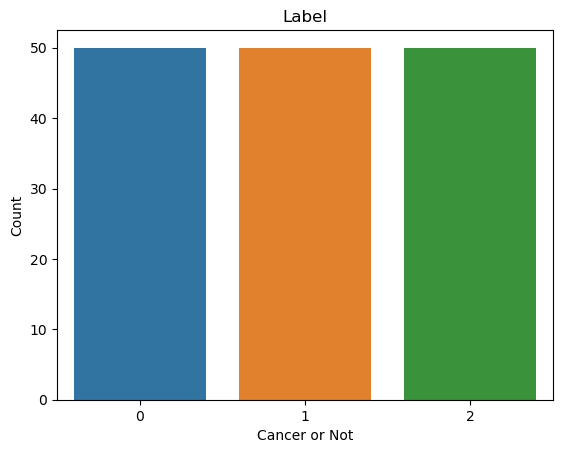

In [9]:
import seaborn as sns

sns.countplot(data = data, x="label")
plt.xlabel("Cancer or Not")
plt.ylabel("Count")
plt.title("Label")

In [10]:
data['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [11]:
X=data.drop('label',axis=1)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
y=data['label']
y.value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [13]:
X = X.to_numpy()

In [14]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [15]:
X.shape

(150, 4, 1)

In [16]:
y = pd.get_dummies(y).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [17]:
n_steps = X.shape[1]
n_steps

4

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam

In [33]:
def build_model(): 
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='sigmoid', input_shape=(n_steps, n_features)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(3))
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0048), metrics=['accuracy'])
    
    return model

model = build_model() 
print("input_shape => ", n_steps, n_features)
model.summary()  

input_shape =>  4 1
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 3, 64)             192       
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 50)                3250      
                                                                 
 dense_13 (Dense)            (None, 3)                 153       
                                                                 
Total params: 3,595
Trainable params: 3,595
Non-trainable params: 0
________________________________

In [34]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
4/4 [==============================] - 1s 84ms/step - loss: 0.6862 - accuracy: 0.3250 - val_loss: 0.6977 - val_accuracy: 0.2000
Epoch 2/100
4/4 [==============================] - 0s 16ms/step - loss: 0.6638 - accuracy: 0.3667 - val_loss: 0.6434 - val_accuracy: 0.5333
Epoch 3/100
4/4 [==============================] - 0s 11ms/step - loss: 0.6278 - accuracy: 0.5833 - val_loss: 0.6364 - val_accuracy: 0.4333
Epoch 4/100
4/4 [==============================] - 0s 9ms/step - loss: 0.6087 - accuracy: 0.7083 - val_loss: 0.5967 - val_accuracy: 0.5000
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 0.6037 - accuracy: 0.5083 - val_loss: 0.5960 - val_accuracy: 0.3333
Epoch 6/100
4/4 [==============================] - 0s 11ms/step - loss: 0.5847 - accuracy: 0.6000 - val_loss: 0.5863 - val_accuracy: 0.5667
Epoch 7/100
4/4 [==============================] - 0s 10ms/step - loss: 0.5671 - accuracy: 0.6917 - val_loss: 0.5884 - val_accuracy: 0.5667
Epoch 8/100
4/4 [====

4/4 [==============================] - 0s 11ms/step - loss: 0.2512 - accuracy: 0.8333 - val_loss: 0.2865 - val_accuracy: 0.6667
Epoch 60/100
4/4 [==============================] - 0s 10ms/step - loss: 0.2516 - accuracy: 0.8500 - val_loss: 0.2758 - val_accuracy: 0.7333
Epoch 61/100
4/4 [==============================] - 0s 10ms/step - loss: 0.2481 - accuracy: 0.8583 - val_loss: 0.2851 - val_accuracy: 0.6667
Epoch 62/100
4/4 [==============================] - 0s 10ms/step - loss: 0.2466 - accuracy: 0.8500 - val_loss: 0.2783 - val_accuracy: 0.7000
Epoch 63/100
4/4 [==============================] - 0s 10ms/step - loss: 0.2532 - accuracy: 0.9000 - val_loss: 0.2655 - val_accuracy: 0.8000
Epoch 64/100
4/4 [==============================] - 0s 13ms/step - loss: 0.2447 - accuracy: 0.8833 - val_loss: 0.2877 - val_accuracy: 0.6667
Epoch 65/100
4/4 [==============================] - 0s 14ms/step - loss: 0.2462 - accuracy: 0.8500 - val_loss: 0.2802 - val_accuracy: 0.7000
Epoch 66/100
4/4 [========

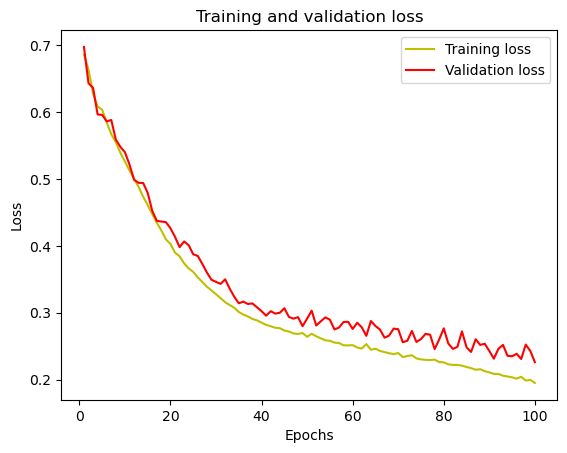

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

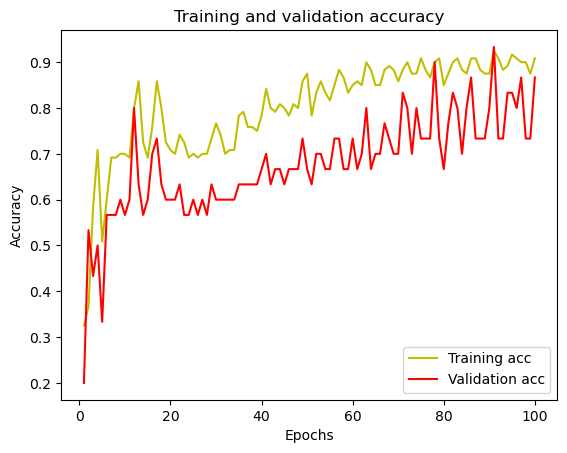

In [36]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [37]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.69      0.82        13
           2       0.60      1.00      0.75         6

    accuracy                           0.87        30
   macro avg       0.87      0.90      0.86        30
weighted avg       0.92      0.87      0.87        30

[[11  0  0]
 [ 0  9  4]
 [ 0  0  6]]
